In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [36]:
df = pd.read_csv('Employee.csv')
df.sample(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
54,Bachelors,2017,New Delhi,3,31,Female,Yes,5,0
3575,Bachelors,2018,Bangalore,3,38,Male,Yes,1,1


<AxesSubplot: xlabel='ExperienceInCurrentDomain', ylabel='Age'>

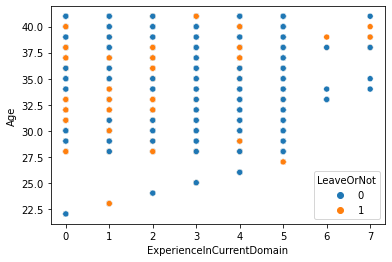

In [37]:
sns.scatterplot(y=df['Age'],x=df['ExperienceInCurrentDomain'],hue=df['LeaveOrNot'])

<AxesSubplot: xlabel='Gender', ylabel='count'>

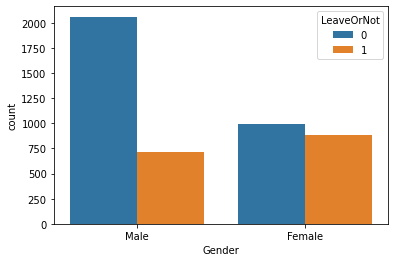

In [38]:
sns.countplot(x=df['Gender'],hue=df['LeaveOrNot'])

<AxesSubplot: xlabel='JoiningYear', ylabel='count'>

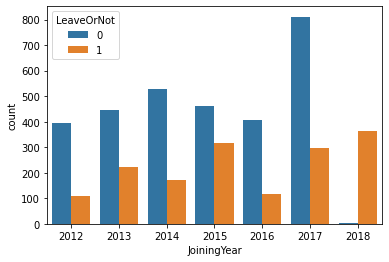

In [39]:
sns.countplot(x=df['JoiningYear'],hue=df['LeaveOrNot'])

<AxesSubplot: xlabel='Education', ylabel='count'>

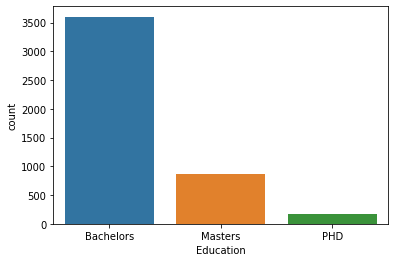

In [40]:
sns.countplot(x=df['Education'])

<AxesSubplot: xlabel='Education', ylabel='count'>

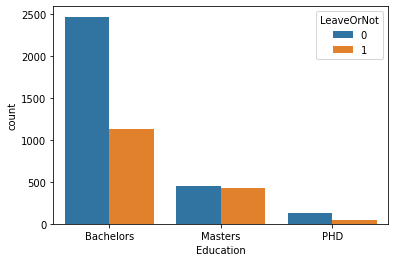

In [41]:
sns.countplot(x=df['Education'],hue=df['LeaveOrNot'])

<AxesSubplot: xlabel='City', ylabel='count'>

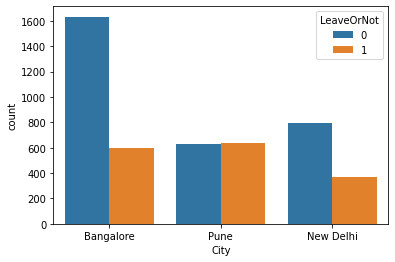

In [42]:
sns.countplot(x=df['City'],hue=df['LeaveOrNot'])

<AxesSubplot: xlabel='City', ylabel='count'>

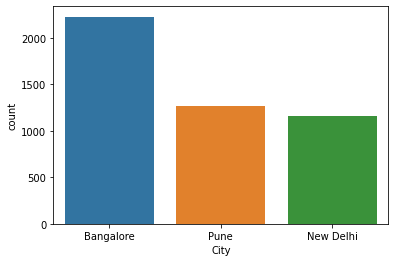

In [43]:
sns.countplot(x=df['City'])

In [44]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [45]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [46]:
trf = ColumnTransformer(transformers=[
    ('oed',OrdinalEncoder(),['Education','City','Gender','EverBenched'])
],remainder='passthrough')

In [47]:
x=df.drop('LeaveOrNot',axis=1)
y= df['LeaveOrNot']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state=False, 
                                   test_size=0.2)

In [49]:
x_train_transform = trf.fit_transform(x_train)

In [50]:
x_test_transform = trf.transform(x_test)

In [51]:
x_test_transform

array([[ 0.,  0.,  1., ...,  3., 25.,  3.],
       [ 0.,  2.,  0., ...,  2., 28.,  3.],
       [ 0.,  0.,  0., ...,  3., 25.,  3.],
       ...,
       [ 0.,  2.,  1., ...,  2., 36.,  0.],
       [ 0.,  2.,  0., ...,  2., 34.,  4.],
       [ 0.,  2.,  1., ...,  3., 26.,  4.]])

In [52]:
pd.DataFrame(x_train_transform,columns=x_train.columns)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0.0,1.0,0.0,1.0,2018.0,3.0,30.0,3.0
1,0.0,0.0,0.0,0.0,2012.0,3.0,27.0,5.0
2,0.0,2.0,0.0,0.0,2012.0,2.0,27.0,5.0
3,0.0,2.0,0.0,0.0,2015.0,3.0,24.0,2.0
4,0.0,0.0,0.0,0.0,2017.0,3.0,24.0,2.0
...,...,...,...,...,...,...,...,...
3717,0.0,0.0,1.0,0.0,2016.0,3.0,28.0,3.0
3718,1.0,1.0,0.0,0.0,2016.0,3.0,33.0,1.0
3719,0.0,1.0,0.0,0.0,2017.0,3.0,26.0,4.0
3720,0.0,2.0,1.0,0.0,2018.0,3.0,27.0,5.0


In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(x_train_transform,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = lr.predict(x_test_transform)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6949516648764769

In [70]:
df.head(1)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0


In [71]:
x=df[['Education','City','PaymentTier','EverBenched','ExperienceInCurrentDomain']]
x

,Education,City,PaymentTier,EverBenched,ExperienceInCurrentDomain
0,Bachelors,Bangalore,3,No,0
1,Bachelors,Pune,1,No,3
2,Bachelors,New Delhi,3,No,2
3,Masters,Bangalore,3,No,5
4,Masters,Pune,3,Yes,2
...,...,...,...,...,...
4648,Bachelors,Bangalore,3,No,4
4649,Masters,Pune,2,No,2
4650,Masters,New Delhi,3,No,5
4651,Bachelors,Bangalore,3,Yes,2
